In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import pickle
from math import sqrt
from sklearn import metrics


In [4]:
nba = pd.read_csv("final_table.csv", index_col=0)
nba.fillna(0, inplace=True)
nba.sample(5)

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
214,De'Andre Hunter,ATL,SF,7068360.0,9085.30,22.0,8.6,778.0,63.0,2018.0,112.0,44.0,18.0
289,Jakob Poeltl,SAS,C,3754886.0,10093.78,24.0,19.1,372.0,66.0,1171.0,116.0,37.0,95.0
161,Jeremy Lamb,IND,SG,10500000.0,18197.57,27.0,14.0,577.0,46.0,1291.0,96.0,55.0,22.0
216,Dāvis Bertāns,WAS,PF,7000000.0,8393.29,27.0,15.5,834.0,54.0,1583.0,92.0,37.0,33.0
133,Larry Nance,0,0,12727273.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
index_names = nba[ nba['g'] == 0.0 ].index
  
# drop these row indexes 
# from dataFrame 
nba.drop(index_names, inplace = True) 
print(nba.head(5))

              Player   tm pos  yr2019_20  avg_cost_per_pt   Age   PER     pts  \
612    Luguentz Dort  OKC  SG   155647.0           637.90  20.0   7.6   244.0   
587        Ky Bowman  GSW  PG   350189.0          1045.34  22.0   9.1   335.0   
545    Eric Paschall  GSW  PF   898310.0          1073.25  23.0  14.5   837.0   
606        PJ Dozier  DEN  PG   183115.0          1089.97  23.0  11.6   168.0   
530  Devonte' Graham  CHO  PG  1416852.0          1237.43  24.0  15.8  1145.0   

        g      mp    ast   stl   blk  
612  36.0   820.0   27.0  31.0   4.0  
587  45.0  1015.0  131.0  44.0  10.0  
545  60.0  1654.0  127.0  32.0  13.0  
606  29.0   412.0   63.0  14.0   6.0  
530  63.0  2211.0  471.0  62.0  15.0  


In [106]:
nba_predict = nba[["Age","pts","stl","ast", "blk","PER"]]
nba_predict.sample(5)

,Age,pts,stl,ast,blk,PER
134,25.0,776.0,101.0,291.0,29.0,13.8
406,22.0,60.0,2.0,29.0,5.0,-0.1
135,28.0,1016.0,77.0,82.0,24.0,14.0
308,22.0,1146.0,82.0,368.0,93.0,20.3
366,21.0,220.0,27.0,51.0,17.0,3.7


In [107]:
# standardize variables
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()

In [108]:
#std_scaler.fit(nba_predict)
std_scaler.fit(nba_predict)

StandardScaler()

In [109]:
scaled_nba =std_scaler.transform(nba_predict)
scaled_nba

array([[-1.41467769, -0.49278527,  0.01212624, -0.63605272, -0.63472827,
        -0.98171858],
       [-0.93849029, -0.2826957 ,  0.50197771,  0.25202715, -0.39158498,
        -0.72804311],
       [-0.70039659,  0.87625993,  0.04980713,  0.21787024, -0.27001334,
         0.18518857],
       ...,
       [-1.17658399, -1.05610234, -1.15598109, -0.86661192, -0.7968238 ,
        -3.56920834],
       [-1.17658399, -1.05610234, -1.11830021, -0.86661192, -0.7968238 ,
         1.08150855],
       [ 0.01388451, -1.05610234, -1.15598109, -0.85807269, -0.7968238 ,
        -4.41479324]])

In [110]:
scaled_df=pd.DataFrame(scaled_nba, columns = nba_predict.columns)
scaled_df.head()

,Age,pts,stl,ast,blk,PER
0,-1.414678,-0.492785,0.012126,-0.636053,-0.634728,-0.981719
1,-0.938490,-0.282696,0.501978,0.252027,-0.391585,-0.728043
2,-0.700397,0.876260,0.049807,0.217870,-0.270013,0.185189
3,-0.700397,-0.668245,-0.628449,-0.328640,-0.553681,-0.305251
4,-0.462303,1.587332,1.180234,3.155365,-0.188966,0.405041


In [111]:
scaled_df.std()

Age    1.001082
pts    1.001082
stl    1.001082
ast    1.001082
blk    1.001082
PER    1.001082
dtype: float64

In [112]:
# target variable
y = nba['yr2019_20']
y.head

<bound method NDFrame.head of 612     155647.0
587     350189.0
545     898310.0
606     183115.0
530    1416852.0
         ...    
596     250000.0
628      81678.0
496    1500000.0
634      50752.0
639      50000.0
Name: yr2019_20, Length: 463, dtype: float64>

In [113]:
X =nba.drop('yr2019_20', axis=1)
X = scaled_df.copy()
X.shape
X.sample(10)

,Age,pts,stl,ast,blk,PER
200,-1.176584,-0.548194,-0.138597,-0.431111,-0.107918,-1.641275
14,-0.462303,0.813926,0.125169,-0.354258,1.391466,1.656506
23,-0.462303,-0.580515,-0.703811,-0.431111,-0.634728,-0.305251
348,-0.224209,0.197509,0.087488,-0.456729,2.120896,1.216802
397,0.966259,-0.462772,-0.063236,-0.593357,-0.432109,-0.136134
32,-0.938490,1.589641,1.933851,2.275825,2.971897,1.166067
370,-0.700397,-0.977607,-1.042938,-0.806837,-0.715776,-0.017752
325,0.490072,-0.624380,-0.176278,-0.559200,-0.472633,-1.133924
232,-1.652771,-0.495094,-0.402363,-0.704367,-0.472633,-1.218482
288,1.204353,0.465316,2.310660,0.132478,0.135225,-0.017752


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15, random_state=42)

In [115]:

# instantiate
my_sal= LinearRegression()
#linreg=LinearRegression()
my_sal.fit(X,y)

LinearRegression()

In [116]:
#fit model  to training dataset
my_sal.fit(X_train, y_train)  # normalize = False, data is expected to be already centered
y_pred = my_sal.predict(X_test)

In [117]:
# predict the y_values on testing dataset
y_pred = my_sal.predict(X_test)
y_pred

array([ 8.06432657e+06,  1.04229093e+07,  5.33964835e+06,  3.54373026e+06,
        2.28227208e+06,  3.08093854e+06,  1.83039074e+07,  1.45868813e+07,
       -8.22975757e+05,  5.67401301e+06,  6.12135781e+06,  1.08354898e+07,
        1.11224664e+07,  7.26273512e+05,  2.19453572e+06,  1.29399656e+07,
        4.08961319e+06,  4.63329599e+06,  5.53721982e+06, -6.52243497e+05,
        6.89238632e+06,  3.75925498e+06,  1.03951633e+07,  1.01582363e+06,
        8.90060028e+06,  7.76937991e+06,  8.56556910e+06,  7.50713297e+05,
        2.72854059e+06,  1.03750170e+07,  7.48999891e+06,  9.42909110e+06,
        8.55224128e+06,  3.81684515e+05,  1.65228242e+07, -3.29981224e+06,
        5.19069846e+06,  1.10270473e+07,  6.48708332e+06,  5.17060001e+06,
        4.72251113e+06,  1.60181265e+06,  1.23359398e+07,  7.97599437e+03,
        3.09671849e+06,  9.37223623e+05,  1.51165742e+07,  7.87024823e+06,
        1.41297817e+07,  1.15776134e+07, -8.43021847e+05,  3.21490740e+06,
        5.26233537e+06,  

In [118]:
#looking at prediction and comparing to true values
[round(x,2)for x in y_pred[:5]]

[8064326.57, 10422909.34, 5339648.35, 3543730.26, 2282272.08]

In [119]:
list(y_test[:5])

[7936508.0, 1445697.0, 2281800.0, 3569643.0, 1618520.0]

In [120]:
# root mean Sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print ('on average my model errs by', rmse)

on average my model errs by 7042755.908170715


In [121]:
avg_val= y_train.mean()
avg_val

7756209.361323155

In [122]:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip = sqrt(metrics.mean_squared_error(y_test, comparison_array))
print ('yr2019_20', round(rmse-coin_flip))

yr2019_20 -1540464


In [123]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.2972895047680635

In [124]:
comparison = np.full(len(y_test), avg_val)
comparison

array([7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316, 7756209.36132316, 7756209.36132316,
       7756209.36132316,

In [125]:
sqrt(metrics.mean_squared_error(y_test, comparison))


8583220.398662863

In [126]:
y_pred

array([ 8.06432657e+06,  1.04229093e+07,  5.33964835e+06,  3.54373026e+06,
        2.28227208e+06,  3.08093854e+06,  1.83039074e+07,  1.45868813e+07,
       -8.22975757e+05,  5.67401301e+06,  6.12135781e+06,  1.08354898e+07,
        1.11224664e+07,  7.26273512e+05,  2.19453572e+06,  1.29399656e+07,
        4.08961319e+06,  4.63329599e+06,  5.53721982e+06, -6.52243497e+05,
        6.89238632e+06,  3.75925498e+06,  1.03951633e+07,  1.01582363e+06,
        8.90060028e+06,  7.76937991e+06,  8.56556910e+06,  7.50713297e+05,
        2.72854059e+06,  1.03750170e+07,  7.48999891e+06,  9.42909110e+06,
        8.55224128e+06,  3.81684515e+05,  1.65228242e+07, -3.29981224e+06,
        5.19069846e+06,  1.10270473e+07,  6.48708332e+06,  5.17060001e+06,
        4.72251113e+06,  1.60181265e+06,  1.23359398e+07,  7.97599437e+03,
        3.09671849e+06,  9.37223623e+05,  1.51165742e+07,  7.87024823e+06,
        1.41297817e+07,  1.15776134e+07, -8.43021847e+05,  3.21490740e+06,
        5.26233537e+06,  

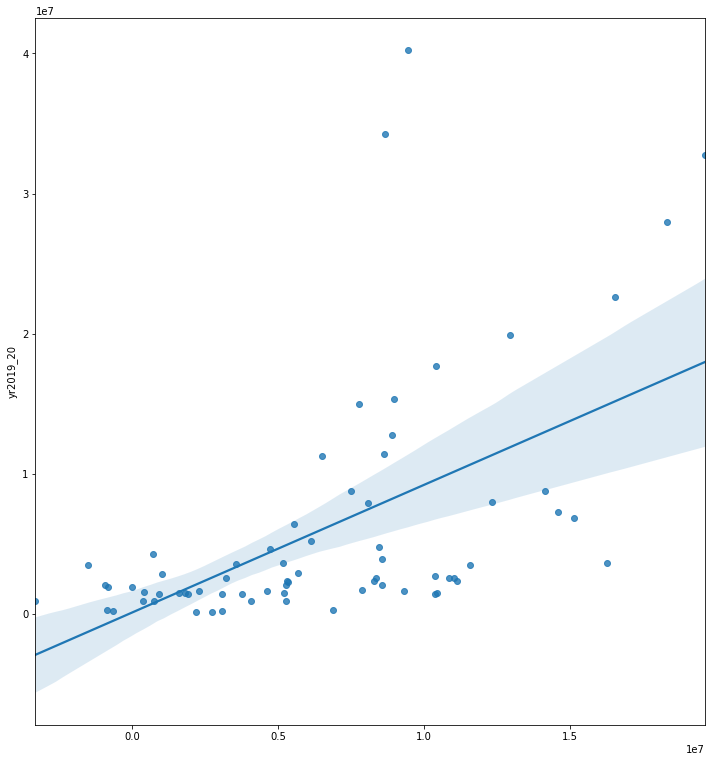

In [127]:
plt.figure(figsize = (12,13))
sns.regplot(x=y_pred, y=y_test);